## Member Team :
## - Arrafiatu Arsy Almas 101320068
## - Kemal Reviansyah Hermawanto 101320118

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [130]:
df = pd.read_csv('Chapter4_Geomechanics_DataSet.csv')
df

,Closure Pressure (psi),YM (MMpsi),PR
0,11421.780480,4.744385,0.369135
1,10775.655920,4.745286,0.353307
2,11682.047010,4.734561,0.347007
3,10778.932700,4.744971,0.365548
4,9937.883140,4.751685,0.255453
...,...,...,...
1002,9563.050842,4.956995,0.395388
1003,7683.981966,4.651399,0.266581
1004,7328.404834,4.651376,0.266708
1005,7884.131274,4.651383,0.257703


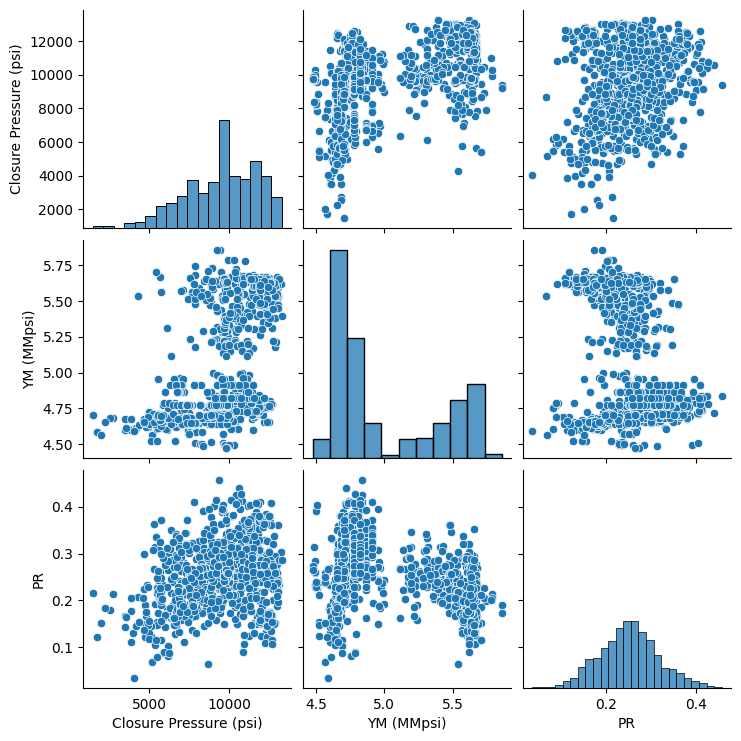

In [131]:
sns.pairplot(df)

In [132]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled

array([[ 0.86891975, -0.64662441,  1.80556814],
       [ 0.576779  , -0.64434448,  1.56568504],
       [ 0.98659747, -0.67147565,  1.47020246],
       ...,
       [-0.98187174, -0.88190785,  0.25321532],
       [-0.73060387, -0.88188999,  0.11674766],
       [-0.85179379, -0.88187031, -0.02933039]])

In [133]:
from sklearn.neighbors import NearestNeighbors

Neighbors = NearestNeighbors(n_neighbors=2)
nbrs = Neighbors.fit(df_scaled)
distances, indices=nbrs.kneighbors(df_scaled)

In [134]:
distances

array([[0.        , 0.09987277],
       [0.        , 0.11768644],
       [0.        , 0.15363125],
       ...,
       [0.        , 0.16078324],
       [0.        , 0.05939761],
       [0.        , 0.11486115]])

In [135]:
indices

array([[   0,  589],
       [   1,  383],
       [   2,  192],
       ...,
       [1004, 1003],
       [1005,  989],
       [1006,  285]], dtype=int64)

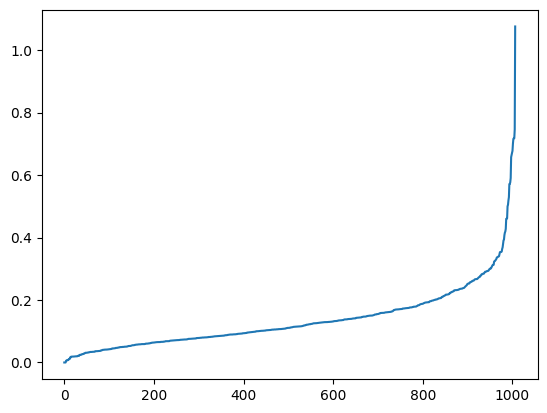

In [136]:
sorted_distances = np.sort(distances[:,1])
plt.plot(sorted_distances)

DBSCAN

In [137]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3, min_samples=6)
clustering = model.fit_predict(df_scaled)

In [138]:
pd.DataFrame(clustering).value_counts()

 0    534
 3    175
-1    171
 7     74
 2     19
 5     16
 1      6
 4      6
 6      6
dtype: int64

In [139]:
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled,clustering)

-0.11714504719666312

In [140]:
labels = model.labels_
n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [141]:
n_noise

171

In [142]:
n_cluster

8

Hyperparameter Tuning (Manual)

In [143]:
eps_range = np.linspace(0.2, 0.5, 5)
sample_range = np.arange(4, 15, 2)
tuning = []
for i in range(len(eps_range)):
  for j in range(len(sample_range)):
    dummy = []
    model = DBSCAN(eps=eps_range[i], min_samples=sample_range[j])
    clustering = model.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, clustering)
    labels = model.labels_
    n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    dummy.append(eps_range[i])
    dummy.append(sample_range[j])
    dummy.append(score)
    dummy.append(n_cluster)
    dummy.append(n_noise)
    tuning.append(dummy)

In [144]:
tuning_result = pd.DataFrame(tuning, columns=['eps', 'min_samples', 'silhouette_score', 'n_cluster', 'n_noise'])
tuning_result.sort_values(by=['silhouette_score'])

,eps,min_samples,silhouette_score,n_cluster,n_noise
5,0.200,14,-0.313872,4,862
4,0.200,12,-0.286103,7,807
1,0.200,6,-0.282345,19,477
6,0.275,4,-0.270584,13,152
2,0.200,8,-0.267640,12,604
3,0.200,10,-0.253081,12,726
0,0.200,4,-0.193761,28,340
7,0.275,6,-0.160701,11,244
12,0.350,4,-0.150068,7,75
9,0.275,10,-0.122463,8,393


<Axes: xlabel='min_samples', ylabel='eps'>

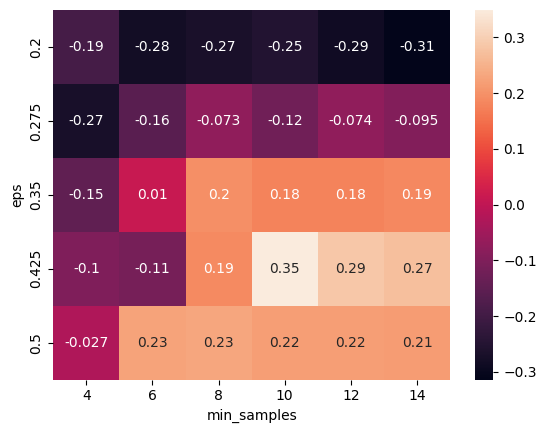

In [145]:
tuning_pivot = tuning_result.pivot(index='eps', columns='min_samples', values='silhouette_score')
sns.heatmap(tuning_pivot, annot=True)

Final Clustering

In [146]:
model = DBSCAN(eps=0.425, min_samples=10)
result = model.fit_predict(df_scaled)
df['cluster'] = result

In [147]:
df

,Closure Pressure (psi),YM (MMpsi),PR,cluster
0,11421.780480,4.744385,0.369135,0
1,10775.655920,4.745286,0.353307,0
2,11682.047010,4.734561,0.347007,0
3,10778.932700,4.744971,0.365548,0
4,9937.883140,4.751685,0.255453,0
...,...,...,...,...
1002,9563.050842,4.956995,0.395388,-1
1003,7683.981966,4.651399,0.266581,0
1004,7328.404834,4.651376,0.266708,0
1005,7884.131274,4.651383,0.257703,0


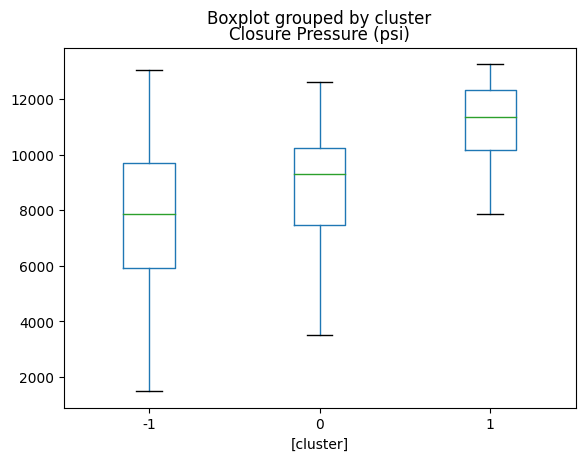

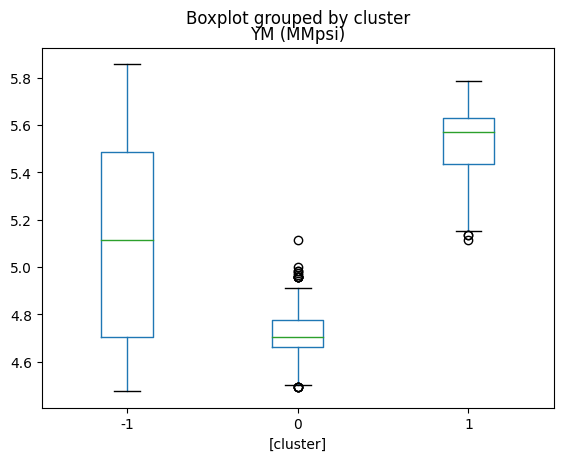

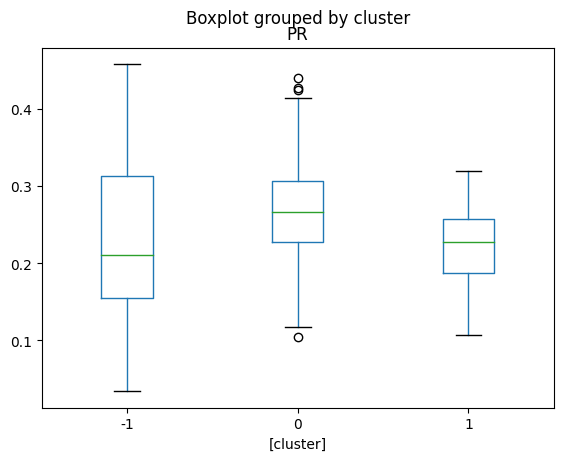

In [148]:
for i in range((len(df.columns)-1)):
  df.boxplot(column=[df.columns[i]], by=['cluster'], grid=False)

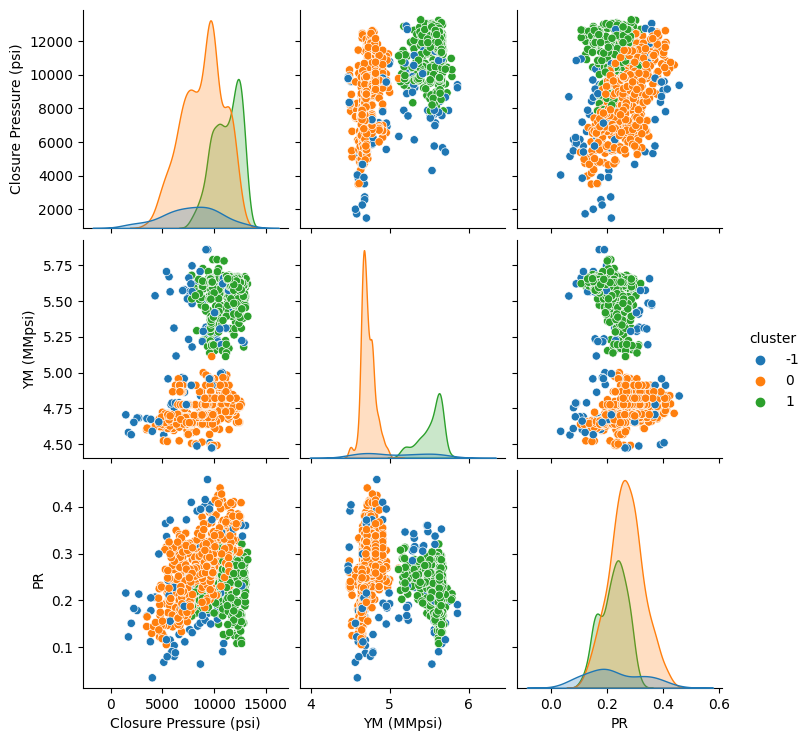

In [149]:
sns.pairplot(df, hue='cluster', palette='tab10')